In [0]:
# Start off by reading the json file.
uri = 's3://sparta-data/nyt2.json'
nyt = spark.read.json(uri).rdd

nyt

Out[218]: MapPartitionsRDD[873] at javaToPython at NativeMethodAccessorImpl.java:0

In [0]:
# See what entries looks like.
nyt.first().asDict()

Out[219]: {'_id': Row($oid='5b4aa4ead3089013507db18b'),
 'amazon_product_url': 'http://www.amazon.com/Odd-Hours-Dean-Koontz/dp/0553807056?tag=NYTBS-20',
 'author': 'Dean R Koontz',
 'bestsellers_date': Row($date=Row($numberLong='1211587200000')),
 'description': 'Odd Thomas, who can communicate with the dead, confronts evil forces in a California coastal town.',
 'price': Row($numberDouble=None, $numberInt='27'),
 'published_date': Row($date=Row($numberLong='1212883200000')),
 'publisher': 'Bantam',
 'rank': Row($numberInt='1'),
 'rank_last_week': Row($numberInt='0'),
 'title': 'ODD HOURS',
 'weeks_on_list': Row($numberInt='1')}

In [0]:
# Number of entries in the json file.
nyt.count()

Out[220]: 10195

In [0]:
# Create a word cloud
from wordcloud import WordCloud, STOPWORDS

STOPWORDS

Out[221]: {'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'therefore',
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [0]:
# In the event I want to update stop words.


#STOPWORDS.update([""])

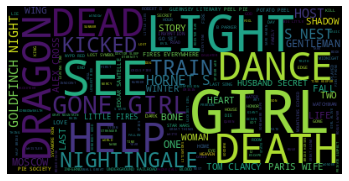

In [0]:
# Create word cloud for words in title field.

textstr = ""
text = nyt.map(lambda x: x.title).collect()
for x in text:
  textstr += x + " "

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords=STOPWORDS).generate(textstr)
x = plt.figure()
plt.imshow(wc)
plt.axis("off")
display(x)

# Analysis, Because of duplicate entries in the json file some words appear because of this.

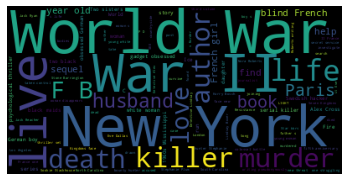

In [0]:
# Create a word cloud of the descriptions field of all books.

text = nyt.map(lambda x: x.description).collect()
for description in text:
  textstr += description + " "
  
wc = WordCloud(stopwords=STOPWORDS).generate(textstr)
x = plt.figure()
plt.imshow(wc)
plt.axis("off")
display(x)

# Analysis, Because of duplicate entries in the json file some words appear because of this.

In [0]:
# Count of how many times an author has had a book in the top 20.

display(nyt.map(lambda x: (x.author, 1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], False).take(20))

_1,_2
John Grisham,226
David Baldacci,222
Danielle Steel,174
Stephen King,157
Anthony Doerr,141
Nicholas Sparks,136
Kristin Hannah,128
Stieg Larsson,121
James Patterson and Maxine Paetro,119
George R R Martin,119


In [0]:
# Get the author and all of his book titles

author = 'John Grisham'
display(nyt.filter(lambda x: author in x.author).map(lambda x: (x.author, x.title)).distinct().sortBy(lambda x: x[1]).collect())


_1,_2
John Grisham,CALICO JOE
John Grisham,CAMINO ISLAND
John Grisham,FORD COUNTY
John Grisham,GRAY MOUNTAIN
John Grisham,ROGUE LAWYER
John Grisham,SYCAMORE ROW
John Grisham,THE APPEAL
John Grisham,THE ASSOCIATE
John Grisham,THE CONFESSION
John Grisham,THE LITIGATORS


In [0]:
# Get the author and all of his book titles

author = 'Jodi Picoult'
display(nyt.filter(lambda x: author in x.author).map(lambda x: (x.author, x.title)).distinct().sortBy(lambda x: x[1]).collect())

_1,_2
Jodi Picoult,HANDLE WITH CARE
Jodi Picoult,HOUSE RULES
Jodi Picoult,LEAVING TIME
Jodi Picoult,LONE WOLF
Jodi Picoult,SING YOU HOME
Jodi Picoult,SMALL GREAT THINGS
Jodi Picoult,THE STORYTELLER


In [0]:
# Number of books published per publisher.

display(nyt.map(lambda x: (x.publisher, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(10))

_1,_2
Putnam,1061
"Little, Brown",943
Grand Central,619
Knopf,559
Doubleday,475
Scribner,456
Ballantine,421
Delacorte,347
Bantam,319
Simon & Schuster,308
